In [140]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

In [113]:
nut = pd.read_excel('음식분류 AI 데이터 영양DB.xlsx')

In [114]:
nut.columns

Index(['음 식 명', '중량(g)', '에너지(kcal)', '탄수화물(g)', '당류(g)', '지방(g)', '단백질(g)',
       '칼슘(mg)', '인(mg)', '나트륨(mg)', '칼륨(mg)', '마그네슘(mg)', '철(mg)', '아연(mg)',
       '콜레스테롤(mg)', '트랜스지방(g)'],
      dtype='object')

In [115]:
nut[['음 식 명','중량(g)','에너지(kcal)','탄수화물(g)','단백질(g)','지방(g)','나트륨(mg)','당류(g)']]

,음 식 명,중량(g),에너지(kcal),탄수화물(g),단백질(g),지방(g),나트륨(mg),당류(g)
0,쌀밥,210.0,334.8000,73.71000,5.76000,0.45000,59.40000,0.000000
1,기타잡곡밥,200.0,302.3620,65.52110,6.70920,0.74620,3.39200,0.000000
2,콩밥,200.0,322.9000,65.84600,8.42800,1.66600,4.10000,0.000000
3,보리밥,200.0,316.1000,70.57000,5.55000,0.14000,4.50000,0.000000
4,돌솥밥,350.0,528.8550,101.85000,10.18700,8.34700,618.31500,0.000000
...,...,...,...,...,...,...,...,...
395,다식,30.0,105.1665,20.81070,3.54630,1.72860,3.84900,6.455700
396,약과,30.0,113.8494,22.18320,2.57400,1.23870,16.45980,2.151900
397,유과,30.0,129.0600,24.13650,0.36090,3.50400,7.05540,1.120950
398,산자,30.0,121.6985,24.70195,0.91035,1.19665,8.01255,10.632825


In [116]:
# nut['중량(g)']/nut['중량(g)']*100

In [117]:
nut = nut.replace('-','0')

In [118]:
columns = nut.columns.drop('음 식 명')
nut[columns] = nut[columns].astype(float)

In [119]:
# nut['비율'] = 100/nut['중량(g)']


# # 영양정보 데이터 조정
# numeric_columns = nut.columns.drop(['음 식 명', '중량(g)', '비율'])
# nut[numeric_columns] = nut[numeric_columns].mul(nut['비율'], axis=0)

# # 중량을 100으로 조정
# nut['중량(g)'] = 100

# nut.drop('비율',axis=1,inplace=True)

In [120]:
nut.columns

Index(['음 식 명', '중량(g)', '에너지(kcal)', '탄수화물(g)', '당류(g)', '지방(g)', '단백질(g)',
       '칼슘(mg)', '인(mg)', '나트륨(mg)', '칼륨(mg)', '마그네슘(mg)', '철(mg)', '아연(mg)',
       '콜레스테롤(mg)', '트랜스지방(g)'],
      dtype='object')

In [147]:
nut = nut[['음 식 명','중량(g)','에너지(kcal)','탄수화물(g)','단백질(g)','지방(g)','나트륨(mg)','당류(g)']]

In [150]:
x = ['쌀밥','마라탕','약과','깨강정']
result = nut.loc[nut['음 식 명'].isin(x)].sum()
result.drop(['음 식 명','중량(g)'],inplace=True)
print(result)

에너지(kcal)    598.9494
탄수화물(g)      109.5132
단백질(g)         12.834
지방(g)         11.5587
나트륨(mg)      100.1598
당류(g)          2.1519
dtype: object


<Figure size 1000x600 with 0 Axes>

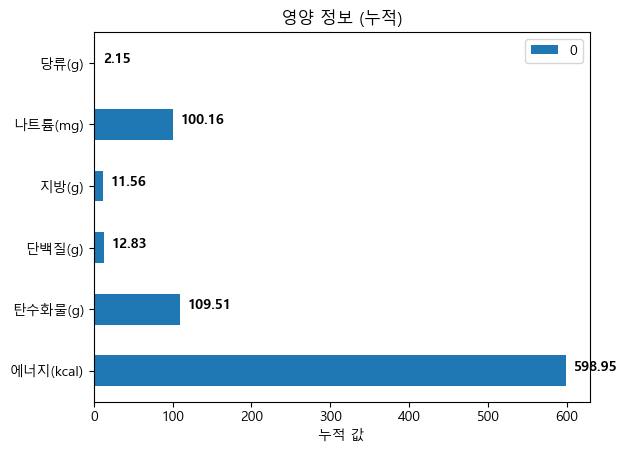

In [151]:
df = pd.DataFrame(result)

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
df.plot(kind='barh', stacked=True)

# 막대에 값 표시
for i, row in enumerate(df.itertuples()):
    for j, value in enumerate(row[1:]):
        plt.text(value + 10, i, f'{value:.2f}', color='black', fontweight='bold')

# 항목 표시
plt.yticks(range(len(df)), df.index)

# 축 레이블 및 제목 설정
plt.xlabel('누적 값')
plt.title('영양 정보 (누적)')

# 그래프 출력
plt.show()